In [1]:
from keras.datasets import imdb
import numpy as np 

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/diop/anaconda3/envs/IA/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/diop/anaconda3/envs/IA/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shape

In [3]:
train_data.shape

(25000,)

In [4]:
max([max(sequence) for sequence in train_data])

9999

# Encodage des séquences d'entiers dans une matrice binaire

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asanyarray(train_labels).astype('float32')
y_test  = np.asanyarray(test_labels).astype('float32')

# Ensemble de validation

In [9]:
x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

# Architecture du réseau

In [10]:
from keras import models
from keras import layers

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2023-02-19 14:02:52.462501: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-02-19 14:02:52.463969: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-19 14:02:52.467306: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Entrainement: 
Utilisation des fonctions de perte personnalisées et des métriques

In [12]:
from keras import losses
from keras import metrics
from keras import optimizers

In [13]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [14]:
history = model.fit(partial_x_train, 
                   partial_y_train, 
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

2023-02-19 14:02:53.513159: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-02-19 14:02:53.539453: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499950000 Hz


Epoch 1/20
30/30 [==============================] - 4s 91ms/step - loss: 0.5954 - binary_accuracy: 0.7057 - val_loss: 0.3913 - val_binary_accuracy: 0.8743
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3290 - binary_accuracy: 0.8995 - val_loss: 0.3028 - val_binary_accuracy: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2280 - binary_accuracy: 0.9251 - val_loss: 0.2811 - val_binary_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1696 - binary_accuracy: 0.9479 - val_loss: 0.3240 - val_binary_accuracy: 0.8694
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1423 - binary_accuracy: 0.9549 - val_loss: 0.3069 - val_binary_accuracy: 0.8809
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1092 - binary_accuracy: 0.9690 - val_loss: 0.3050 - val_binary_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - los

In [16]:
history_dict = history.history

In [17]:
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

# Tracé de la perte pendant l'entrainement et la validation

In [19]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

In [21]:
import matplotlib.pyplot as plt 

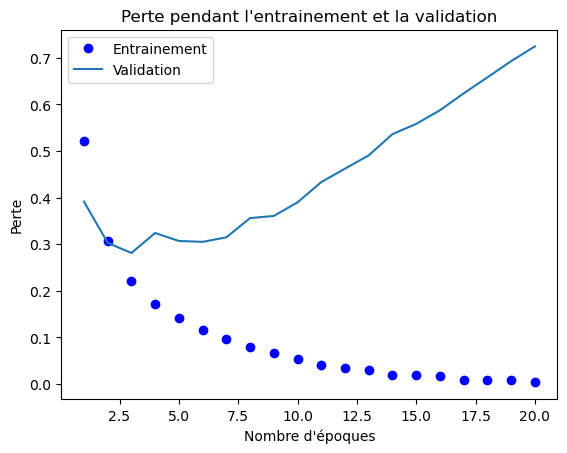

In [27]:
plt.plot(epochs, loss_values, 'bo', label = "Entrainement")
plt.plot(epochs, val_loss_values, label="Validation")

plt.title("Perte pendant l\'entrainement et la validation")
plt.xlabel("Nombre d\'époques")
plt.ylabel("Perte")
plt.legend()

# Tracé de l'exactitude pendant l'entrainement et la validation

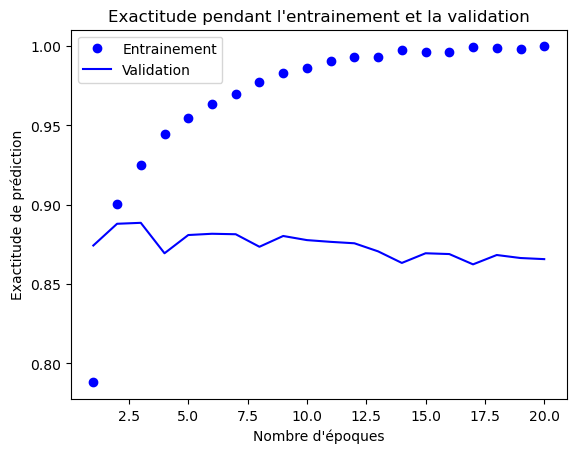

In [30]:
binary_accuracy_values = history_dict['binary_accuracy']
val_binary_accuracy_values = history_dict['val_binary_accuracy']

plt.plot(epochs, binary_accuracy_values, 'bo', label= "Entrainement")
plt.plot(epochs, val_binary_accuracy_values, 'b', label="Validation")

plt.title("Exactitude pendant l\'entrainement et la validation")
plt.xlabel("Nombre d\'époques")
plt.ylabel("Exactitude de prédiction")
plt.legend()
